In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
hd = pd.read_csv("C:/Users/yingyinchu/Desktop/NCCU/ML/hw_data_ML/hw2&hw3/housing.csv",sep=",")

In [2]:
from sklearn.model_selection import train_test_split

In [2]:
hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 資料探索

In [6]:
hd_dropNA = hd.dropna()
hd_dropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


housing median age

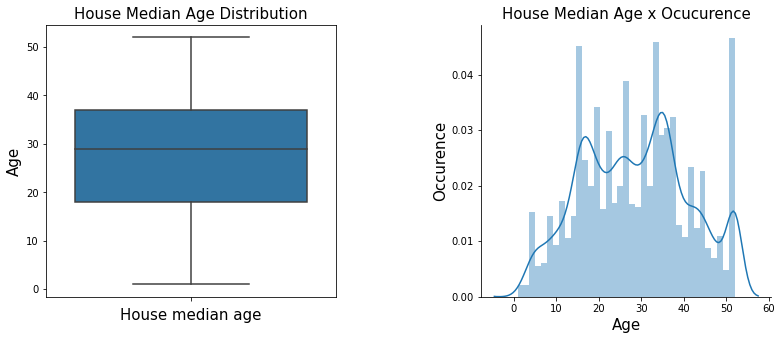

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# 畫 housing_median_age的分布
sns.boxplot(x= 'housing_median_age', data = hd_dropNA, orient = 'v', ax = ax1) # orient=v把box調成垂直
ax1.set_xlabel('House median age', fontsize=15) 
ax1.set_ylabel('Age', fontsize=15)        
ax1.set_title('House Median Age Distribution', fontsize=15)  

sns.distplot(hd_dropNA['housing_median_age'], ax = ax2)
sns.despine(ax = ax2)                      # 進行圖邊框控制
ax2.set_xlabel('Age', fontsize=15)        
ax2.set_ylabel('Occurence', fontsize=15)  
ax2.set_title('House Median Age x Ocucurence', fontsize=15)  

# 進行圖的設定
plt.subplots_adjust(wspace=0.5)
# plt.tight_layout() #會靠比較緊
plt.show()

離海距離

In [16]:
set(hd_dropNA['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

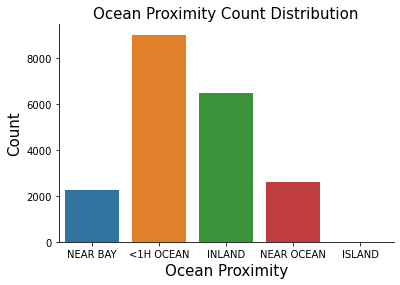

In [18]:
fig, ax = plt.subplots()
sns.countplot(x = 'ocean_proximity', data = hd_dropNA)
ax.set_xlabel('Ocean Proximity', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Ocean Proximity Count Distribution', fontsize=15)
sns.despine()

房間數、廁所數

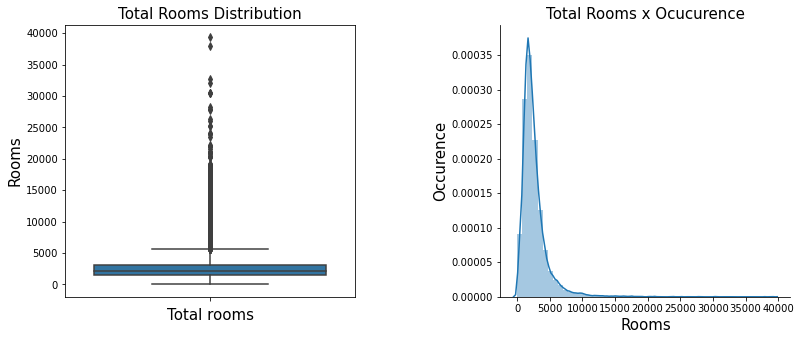

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.boxplot(x= 'total_rooms', data = hd_dropNA, orient = 'v', ax = ax1) # orient=v把box調成垂直
ax1.set_xlabel('Total rooms', fontsize=15) 
ax1.set_ylabel('Rooms', fontsize=15)        
ax1.set_title('Total Rooms Distribution', fontsize=15)  

sns.distplot(hd_dropNA['total_rooms'], ax = ax2)
sns.despine(ax = ax2)                      # 進行圖邊框控制
ax2.set_xlabel('Rooms', fontsize=15)        
ax2.set_ylabel('Occurence', fontsize=15)  
ax2.set_title('Total Rooms x Ocucurence', fontsize=15)  

# 進行圖的設定
plt.subplots_adjust(wspace=0.5)
# plt.tight_layout() #會靠比較緊
plt.show()

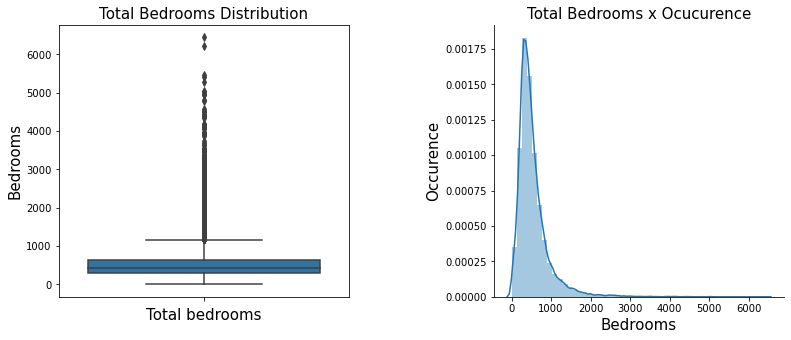

In [25]:
fig, (ax3, ax4) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.boxplot(x= 'total_bedrooms', data = hd_dropNA, orient = 'v', ax = ax3) # orient=v把box調成垂直
ax3.set_xlabel('Total bedrooms', fontsize=15) 
ax3.set_ylabel('Bedrooms', fontsize=15)        
ax3.set_title('Total Bedrooms Distribution', fontsize=15)  

sns.distplot(hd_dropNA['total_bedrooms'], ax = ax4)
sns.despine(ax = ax4)                      # 進行圖邊框控制
ax4.set_xlabel('Bedrooms', fontsize=15)        
ax4.set_ylabel('Occurence', fontsize=15)  
ax4.set_title('Total Bedrooms x Ocucurence', fontsize=15)  

plt.subplots_adjust(wspace=0.5)
plt.show()

人口數、家戶數

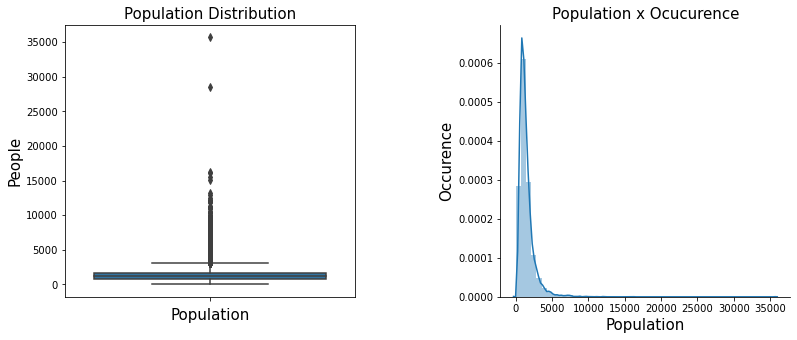

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.boxplot(x= 'population', data = hd_dropNA, orient = 'v', ax = ax1) # orient=v把box調成垂直
ax1.set_xlabel('Population', fontsize=15) 
ax1.set_ylabel('People', fontsize=15)        
ax1.set_title('Population Distribution', fontsize=15)  

sns.distplot(hd_dropNA['population'], ax = ax2)
sns.despine(ax = ax2)                      # 進行圖邊框控制
ax2.set_xlabel('Population', fontsize=15)        
ax2.set_ylabel('Occurence', fontsize=15)  
ax2.set_title('Population x Ocucurence', fontsize=15)  

# 進行圖的設定
plt.subplots_adjust(wspace=0.5)
plt.show()

median income and median house value

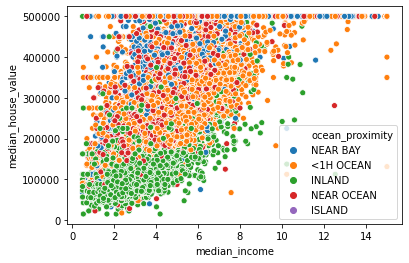

In [40]:
sns.scatterplot(hd_dropNA['median_income'],hd_dropNA['median_house_value'],hue = hd_dropNA['ocean_proximity'])

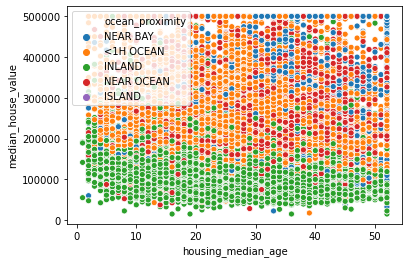

In [39]:
sns.scatterplot(hd_dropNA['housing_median_age'],hd_dropNA['median_house_value'],hue = hd_dropNA['ocean_proximity'])

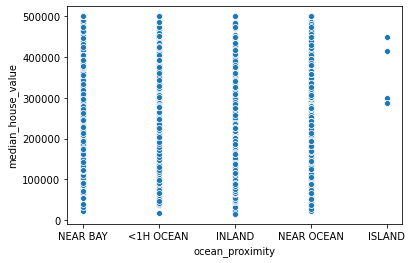

In [41]:
sns.scatterplot(hd_dropNA['ocean_proximity'],hd_dropNA['median_house_value'])

## data: housing.csv
## Q1-4
請使用 housing.csv 地區房價資料，透過 housing_median_age, total_rooms, total_bedrooms, population, households, median_income 這幾項來預估 median_house_value。本題使用線性迴歸來作答(Linear Regression)。記得先找出資料內有無有空值，先將帶有空值的資料去除後再繼續做線性迴歸（將test_size設為0.35，而random_state則設為1進行題目）

### Q1、2: shape: x_train, y_test

In [36]:
hd_new = hd.dropna()

In [37]:
# 切割資料
x_train, x_test, y_train, y_test = train_test_split(hd_new[['housing_median_age','total_rooms','total_bedrooms', 'population', 'households', 'median_income']], hd_new['median_house_value'], # x,y
                                                    test_size=0.35, 
                                                    random_state=1)

In [38]:
x_train.shape

(13281, 6)

In [39]:
y_test.shape

(7152,)

In [22]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7152 entries, 6715 to 12212
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  7152 non-null   float64
 1   total_rooms         7152 non-null   float64
 2   total_bedrooms      7152 non-null   float64
 3   population          7152 non-null   float64
 4   households          7152 non-null   float64
 5   median_income       7152 non-null   float64
dtypes: float64(6)
memory usage: 391.1 KB


### Q3: 1915th預測數值

In [10]:
from sklearn.linear_model import LinearRegression 

# 建立模型
model_1 = LinearRegression() # 括號內可以放參數，因為線性迴歸是很簡單的模型，通常我們不太需要調整參數，因此這邊留空白即可。
# 將資料餵給模型
model_1.fit(x_train, y_train) 

LinearRegression()

In [11]:
pred = model_1.predict(x_test)
# 印出預測結果
result = pd.DataFrame({'actual_y':y_test,'pred_y':pred})
result

,actual_y,pred_y
6715,360900.0,399940.618470
4121,291500.0,281088.992769
15433,131300.0,125806.433617
20272,500001.0,299045.562786
11843,118800.0,135898.724171
...,...,...
555,162500.0,171076.341242
19807,80000.0,161583.471897
16679,275000.0,235336.922640
12401,102600.0,186784.879397


In [19]:
hd_new.head(1905)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
1911,-120.16,39.04,18.0,2040.0,402.0,350.0,129.0,4.0313,126000.0,INLAND
1912,-120.16,39.01,16.0,1463.0,264.0,54.0,26.0,4.9750,206300.0,INLAND
1913,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,INLAND
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND


In [25]:
data1915 = hd_new.iloc[1914,2:8] # 這時候是series
data1915 = data1915.to_frame().transpose() # to_frame轉乘dataframe 再轉置
data1915

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1925,10,81,41,55,16,4.9583


In [26]:
model_1.predict(data1915)

array([210840.49791614])

In [23]:
data1915th = hd.iloc[1914,2:8] # 這時候是series
data1915th = data1915th.to_frame().transpose() # 轉置
data1915th

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1914,33,1561,282,30,11,1.875


In [24]:
model_1.predict(data1915th)

array([103161.03870154])

### Q4: 使用sklearn.metrics，請問MAE, RMSE, R-square分別是多少呢？
(55889.434386, 76289.481502, 0.575135)

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# 印出預測績效(R-square)
print(f'Linear Regressor\'s score: {model_1.score(x_test, y_test)}') 
# 印出其他迴歸績效指標
pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

Linear Regressor's score: 0.5751345942795488


,R-square,MAE,MSE,RMSE
value,0.575135,55889.434386,5.820085e+09,76289.481502


### Q11、knn
接下來將使用K-近鄰演算法(KNeighbors, KNN)來做預測，比較預測結果的差異。記得一樣要先除去空值，所使用資料跟條件也均跟前面題目相同：random_state均設為1。

今天想知道housing.csv的預測結果績效，使用sklearn.metrics，請問R-square, MAE, RMSE分別是多少呢？

In [8]:
from sklearn.neighbors import KNeighborsRegressor

model_k = KNeighborsRegressor()
model_k.fit(x_train, y_train)
pred = model_k.predict(x_test)

pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

,R-square,MAE,MSE,RMSE
value,0.255027,77630.82981,1.020513e+10,101020.418797


In [9]:
pd.DataFrame({'actual_y':y_test,'pred_y':pred})

,actual_y,pred_y
6715,360900.0,336100.2
4121,291500.0,292720.0
15433,131300.0,121520.0
20272,500001.0,455060.4
11843,118800.0,156580.0
...,...,...
555,162500.0,143700.0
19807,80000.0,75580.0
16679,275000.0,261680.2
12401,102600.0,177840.0


### Q13 decision tree
今天想知道housing.csv的預測結果績效，使用sklearn.metrics，請問R-square, MAE, RMSE分別是多少呢？

a. (0.3591, 66489.677293, 93698.844165)

b. (0.575135, 55889.434386, 76289.481502)

c. (0.3591, 66489.677293, 76289.481502)

d. (0.575135, 77630.82981, 93698.844165)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score

model_d = DecisionTreeClassifier()
model_d.fit(x_train, y_train)
pred = model_d.predict(x_test)

In [41]:
pd.DataFrame({'actual_y':y_test,'pred_y':pred})

,actual_y,pred_y
6715,360900.0,495900.0
4121,291500.0,399000.0
15433,131300.0,124100.0
20272,500001.0,344200.0
11843,118800.0,93400.0
...,...,...
555,162500.0,166700.0
19807,80000.0,57500.0
16679,275000.0,457300.0
12401,102600.0,125000.0


In [42]:
print(f'Decision tree\'s score: {model_d.score(x_test, y_test)}') 
# 印出其他迴歸績效指標
pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

Decision tree's score: 0.025727069351230425


,R-square,MAE,RMSE
value,0.331222,68379.047679,95714.960011
